In [1]:
pip install alpha_vantage pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from alpha_vantage.techindicators import TechIndicators
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt 
import sys
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import accuracy_score







In [4]:
# Obtaining stock data from alpha vantage 
sym='AAPL'


# funtion to obtain data from alpha vantage API
def stock_data(sym, date_of_data):
    ts = TimeSeries(key='SUXOFAIGXM6HEP9Y', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data_date_changed = data[:date_of_data]
    data_date_changed['Ticker']= sym
    return data_date_changed

In [5]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i)
  fig.show()

In [6]:
data_dated= stock_data(sym,'2015-01-01')

<ipython-input-4-389ba0d25671>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_date_changed['Ticker']= sym


In [7]:
data_dated.head(10)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   
2021-03-25   119.54  121.6600  119.0000    120.59             120.59   
2021-03-24   122.82  122.9000  120.0650    120.09             120.09   
2021-03-23   123.33  124.2400  122.1400    122.54             122.54   
2021-03-22   120.33  123.8700  120.2600    123.39             123.39   
2021-03-19   119.90  121.4300  119.6750    119.99             119.99   
2021-03-18   122.88  123.1800  120.3200    120.53             120.53   

              6. volume  7. dividend amount  8. split coefficient Ticker  
date                                                                      
2021-03-31  118162905.0                 0.0                   1.0   AAPL  
2021-03-30   85671919.0                 0.0                   1.0   AAPL  
2021-03-29   80819203.0                 0.0                   1.0   AAPL  
2021-03-26   94071234.0                 0.0                   1.0   AAPL  
2021-03-25   98844681.0                 0.0                   1.0   AAPL  
2021-03-24   88530485.0                 0.0                   1.0   AAPL  
2021-03-23   95467142.0                 0.0                   1.0   AAPL  
2021-03-22  111912284.0                 0.0                   1.0   AAPL  
2021-03-19  185549522.0                 0.0                   1.0   AAPL  
2021-03-18  121469755.0                 0.0                   1.0   AAPL

In [8]:
# Check if Null values exist in stock prices data
data_dated.isnull().sum()

1. open                 0
2. high                 0
3. low                  0
4. close                0
5. adjusted close       0
6. volume               0
7. dividend amount      0
8. split coefficient    0
Ticker                  0
dtype: int64

In [9]:
# Get stock prices dataframe info
data_dated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1572 entries, 2021-03-31 to 2015-01-02
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               1572 non-null   float64
 1   2. high               1572 non-null   float64
 2   3. low                1572 non-null   float64
 3   4. close              1572 non-null   float64
 4   5. adjusted close     1572 non-null   float64
 5   6. volume             1572 non-null   float64
 6   7. dividend amount    1572 non-null   float64
 7   8. split coefficient  1572 non-null   float64
 8   Ticker                1572 non-null   object 
dtypes: float64(8), object(1)
memory usage: 122.8+ KB


In [10]:
data_dated.describe()

1. open      2. high       3. low     4. close  5. adjusted close  \
count  1572.000000  1572.000000  1572.000000  1572.000000        1572.000000   
mean    170.285681   172.061791   168.611282   170.431415          49.847576   
std      71.810685    72.861777    71.001740    72.089587          29.681280   
min      90.000000    91.670000    89.470000    90.340000          21.131248   
25%     117.442500   118.667500   116.265000   117.312500          28.119607   
50%     152.475000   153.925000   150.215000   152.750000          40.808771   
75%     198.457500   199.857500   196.242500   198.482500          54.526801   
max     514.790000   515.140000   500.330000   506.090000         142.945728   

          6. volume  7. dividend amount  8. split coefficient  
count  1.572000e+03         1572.000000           1572.000000  
mean   4.469414e+07            0.009796              1.001908  
std    3.374494e+07            0.079667              0.075665  
min    1.136204e+07            0.000000              1.000000  
25%    2.513573e+07            0.000000              1.000000  
50%    3.353945e+07            0.000000              1.000000  
75%    4.969367e+07            0.000000              1.000000  
max    3.326072e+08            0.820000              4.000000

In [11]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data,days):
  
  # 1 day window 
#   n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['4. close']].shift(-days)
  
  # return the new dataset 
  return data

In [12]:
df=data_dated.copy()

In [13]:
data_dated['change_in_price'] = data_dated['4. close'].diff()

In [14]:
data_dated

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-03-31   121.65  123.5200  121.1500    122.15         122.150000   
2021-03-30   120.11  120.4031  118.8600    119.90         119.900000   
2021-03-29   121.65  122.5800  120.7299    121.39         121.390000   
2021-03-26   120.35  121.4800  118.9200    121.21         121.210000   
2021-03-25   119.54  121.6600  119.0000    120.59         120.590000   
...             ...       ...       ...       ...                ...   
2015-01-08   109.23  112.1500  108.7000    111.89          25.441309   
2015-01-07   107.20  108.2000  106.6950    107.75          24.499965   
2015-01-06   106.54  107.4300  104.6300    106.26          24.161172   
2015-01-05   108.29  108.6500  105.4100    106.25          24.158898   
2015-01-02   111.39  111.4400  107.3500    109.33          24.859222   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-31  118162905.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
2021-03-25   98844681.0                 0.0                   1.0   AAPL   
...                 ...                 ...                   ...    ...   
2015-01-08   59364547.0                 0.0                   1.0   AAPL   
2015-01-07   40105934.0                 0.0                   1.0   AAPL   
2015-01-06   65797116.0                 0.0                   1.0   AAPL   
2015-01-05   64285491.0                 0.0                   1.0   AAPL   
2015-01-02   53204626.0                 0.0                   1.0   AAPL   

            change_in_price  
date                         
2021-03-31              NaN  
2021-03-30            -2.25  
2021-03-29             1.49  
2021-03-26            -0.18  
2021-03-25            -0.62  
...                     ...  
2015-01-08            -0.12  
2015-01-07            -4.14  
2015-01-06            -1.49  
2015-01-05            -0.01  
2015-01-02             3.08  

[1572 rows x 10 columns]

In [15]:

def stochastic_Oscillator(data_dated):

    # Calculate the Stochastic Oscillator
    n = 14

    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

    # Calculate the Stochastic Oscillator.
    k_percent = 100 * ((data_dated['4. close'] - low_14) / (high_14 - low_14))

    # Add the info to the data frame.
    data_dated['low_14'] = low_14
    data_dated['high_14'] = high_14
    data_dated['k_percent'] = k_percent


stochastic_Oscillator(data_dated)
# Display the head.
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   
2021-03-25   119.54  121.6600  119.0000    120.59             120.59   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-31  118162905.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
2021-03-25   98844681.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  
date                                                     
2021-03-31              NaN     NaN      NaN        NaN  
2021-03-30            -2.25     NaN      NaN        NaN  
2021-03-29             1.49     NaN      NaN        NaN  
2021-03-26            -0.18     NaN      NaN        NaN  
2021-03-25            -0.62     NaN      NaN        NaN

In [16]:
def calc_williams_r(data_dated):
# Calculate the Williams %R
    n = 14

    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

    # Calculate William %R indicator.
    r_percent = ((high_14 - data_dated['4. close']) / (high_14 - low_14)) * - 100

    # Add the info to the data frame.
    data_dated['r_percent'] = r_percent


calc_williams_r(data_dated)
# Display the head.
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   
2021-03-25   119.54  121.6600  119.0000    120.59             120.59   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-31  118162905.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
2021-03-25   98844681.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  r_percent  
date                                                                
2021-03-31              NaN     NaN      NaN        NaN        NaN  
2021-03-30            -2.25     NaN      NaN        NaN        NaN  
2021-03-29             1.49     NaN      NaN        NaN        NaN  
2021-03-26            -0.18     NaN      NaN        NaN        NaN  
2021-03-25            -0.62     NaN      NaN        NaN        NaN

In [17]:
def calc_madcd(data_dated):
    # Calculate the MACD
    ema_26 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 26).mean())
    ema_12 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 12).mean())
    macd = ema_12 - ema_26

    # Calculate the EMA
    ema_9_macd = macd.ewm(span = 9).mean()

    # Store the data in the data frame.
    data_dated['MACD'] = macd
    data_dated['MACD_EMA'] = ema_9_macd
    

calc_madcd(data_dated)   
# Print the head.
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   
2021-03-25   119.54  121.6600  119.0000    120.59             120.59   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-31  118162905.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
2021-03-25   98844681.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  r_percent      MACD  \
date                                                                           
2021-03-31              NaN     NaN      NaN        NaN        NaN  0.000000   
2021-03-30            -2.25     NaN      NaN        NaN        NaN -0.050481   
2021-03-29             1.49     NaN      NaN        NaN        NaN -0.018118   
2021-03-26            -0.18     NaN      NaN        NaN        NaN -0.009453   
2021-03-25            -0.62     NaN      NaN        NaN        NaN -0.029217   

            MACD_EMA  
date                  
2021-03-31  0.000000  
2021-03-30 -0.028045  
2021-03-29 -0.023976  
2021-03-26 -0.019057  
2021-03-25 -0.022079

In [18]:
def calc_price_rate_of_change(data_dated):
    # Calculate the Price Rate of Change
    n = 9

    # Calculate the Rate of Change in the Price, and store it in the Data Frame.
    data_dated['Price_Rate_Of_Change'] = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.pct_change(periods = n))

calc_price_rate_of_change(data_dated)
# Print the first 30 rows
data_dated.head(5)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   
2021-03-25   119.54  121.6600  119.0000    120.59             120.59   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-03-31  118162905.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
2021-03-25   98844681.0                 0.0                   1.0   AAPL   

            change_in_price  low_14  high_14  k_percent  r_percent      MACD  \
date                                                                           
2021-03-31              NaN     NaN      NaN        NaN        NaN  0.000000   
2021-03-30            -2.25     NaN      NaN        NaN        NaN -0.050481   
2021-03-29             1.49     NaN      NaN        NaN        NaN -0.018118   
2021-03-26            -0.18     NaN      NaN        NaN        NaN -0.009453   
2021-03-25            -0.62     NaN      NaN        NaN        NaN -0.029217   

            MACD_EMA  Price_Rate_Of_Change  
date                                        
2021-03-31  0.000000                   NaN  
2021-03-30 -0.028045                   NaN  
2021-03-29 -0.023976                   NaN  
2021-03-26 -0.019057                   NaN  
2021-03-25 -0.022079                   NaN

In [19]:
data_dated = trading_window(data_dated,1)

In [20]:
data_dated = data_dated[:-1]

In [21]:
data_dated.reset_index(inplace = True) 

In [22]:
data_dated.drop(['Ticker','2. high','3. low', '1. open', '5. adjusted close', '7. dividend amount', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True) 

/Users/aesthetic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df_lstm=data_dated.copy()
df_RandomForest=data_dated.copy()
copy_df=data_dated.copy()

In [24]:
data_dated.head(10)

date  4. close    6. volume  change_in_price  k_percent  r_percent  \
0 2021-03-31    122.15  118162905.0              NaN        NaN        NaN   
1 2021-03-30    119.90   85671919.0            -2.25        NaN        NaN   
2 2021-03-29    121.39   80819203.0             1.49        NaN        NaN   
3 2021-03-26    121.21   94071234.0            -0.18        NaN        NaN   
4 2021-03-25    120.59   98844681.0            -0.62        NaN        NaN   
5 2021-03-24    120.09   88530485.0            -0.50        NaN        NaN   
6 2021-03-23    122.54   95467142.0             2.45        NaN        NaN   
7 2021-03-22    123.39  111912284.0             0.85        NaN        NaN   
8 2021-03-19    119.99  185549522.0            -3.40        NaN        NaN   
9 2021-03-18    120.53  121469755.0             0.54        NaN        NaN   

       MACD  Price_Rate_Of_Change  Target  
0  0.000000                   NaN  119.90  
1 -0.050481                   NaN  121.39  
2 -0.018118                   NaN  121.21  
3 -0.009453                   NaN  120.59  
4 -0.029217                   NaN  120.09  
5 -0.061929                   NaN  122.54  
6  0.029148                   NaN  123.39  
7  0.130175                   NaN  119.99  
8  0.029468                   NaN  120.53  
9 -0.014585             -0.013262  124.76

In [25]:
# Any row that has a `NaN` value will be dropped.
data_dated = data_dated.dropna()

In [26]:
cv = KFold(n_splits=10, random_state=None, shuffle=False)
sc = MinMaxScaler(feature_range = (0, 1))

In [27]:
X = data_dated.iloc[:, :-1]
y = data_dated.iloc[:, -1]

In [28]:
cv.split(X)

<generator object _BaseKFold.split at 0x7fb2a5ee4eb0>

In [29]:
# alphas = 10**np.linspace(10,-2,100)*0.5
# alphas

In [30]:
df_lstm=df_lstm.reset_index()

In [31]:

# regression_model = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
regression_model = Ridge()

 
Accuracy for Split 1
0.8868488398187362
MSE: 0.006154317517364154
RMSE: 0.07844945836246515
Rsquared 0.8868488398187362
MAE: 0.023873185254686378
 
 
Accuracy for Split 2
0.963931993205688
MSE: 0.0017439317420278706
RMSE: 0.04176040878664708
Rsquared 0.963931993205688
MAE: 0.02880658740489139
 
 
Accuracy for Split 3
0.98831445525536
MSE: 0.0007063457300374207
RMSE: 0.026577165575685846
Rsquared 0.98831445525536
MAE: 0.020596154625487438
 
 
Accuracy for Split 4
0.9642775084224992
MSE: 0.0022700974671937776
RMSE: 0.04764553984575867
Rsquared 0.9642775084224992
MAE: 0.03398823497336884
 
 
Accuracy for Split 5
0.9802919397025165
MSE: 0.0014274403765122366
RMSE: 0.037781481925835525
Rsquared 0.9802919397025165
MAE: 0.027433805217647267
 
 
Accuracy for Split 6
0.9232670408265234
MSE: 0.005147187732674298
RMSE: 0.07174390380146803
Rsquared 0.9232670408265234
MAE: 0.05573896196142907
 
 
Accuracy for Split 7
0.988480289644483
MSE: 0.0009879818318317538
RMSE: 0.031432178286459146
Rsquared

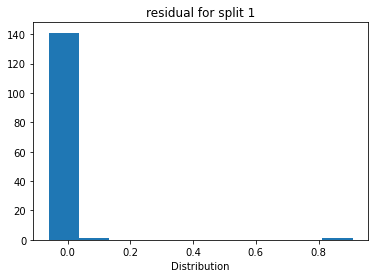

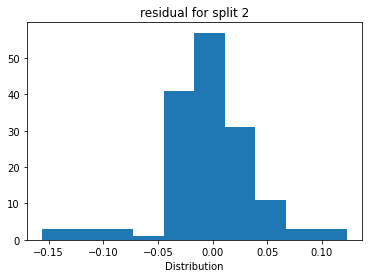

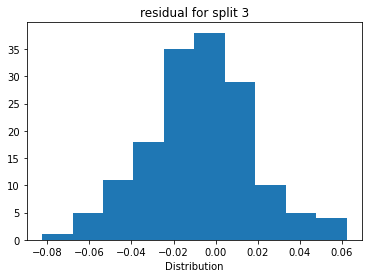

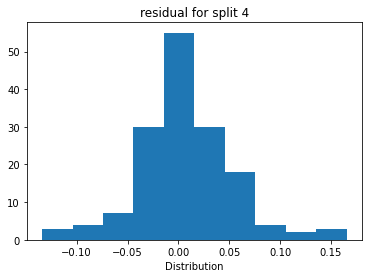

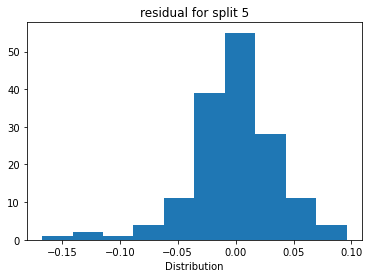

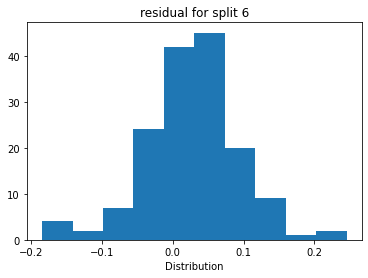

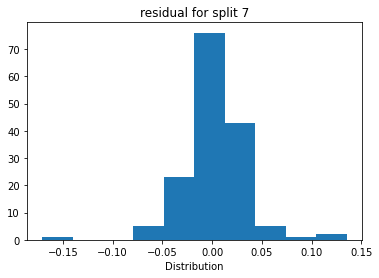

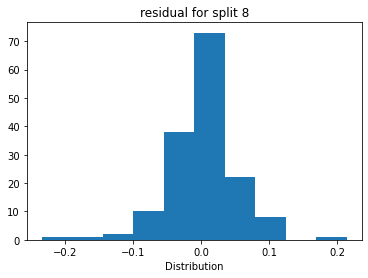

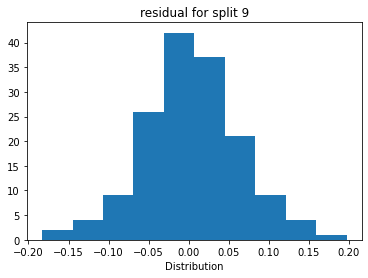

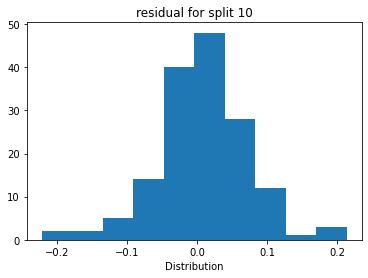

In [32]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=1


for train_index, test_index in cv.split(X):
    X_train, X_test =X.reindex(train_index), X.reindex(test_index)
    y_train, y_test = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    y_train = y_train.dropna()
    X_train = X_train.dropna()
    y_test = y_test.dropna()
    X_test = X_test.dropna()
    
    

    X_train= sc.fit_transform(X_train.iloc[:, 1:])  
    X_test= sc.fit_transform(X_test.iloc[:, 1:])  
    y_train=sc.fit_transform(y_train.values.reshape(-1,1)) 
    y_test= sc.fit_transform(y_test.values.reshape(-1, 1)) 

    
    regression_model.fit(X_train, y_train)
    print(" ")
    print('Accuracy for Split '+ str(p))
    print(regression_model.score(X_test, y_test))
    accuracy_scores.append(regression_model.score(X_test, y_test))

    pred = regression_model.predict(X_test)
    residual= y_test-pred
   
    fig, ax = plt.subplots()
    ax.hist( residual)
    print('MSE: ' +str(mean_squared_error(y_test, pred)))
    mse.append(mean_squared_error(y_test, pred))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test, pred))))
    rmse.append(math.sqrt(mean_squared_error(y_test, pred)))
    print('Rsquared '+ str(r2_score(y_test, pred)))
    rsquared.append(r2_score(y_test, pred))
    print('MAE: ' + str(mean_absolute_error(y_test, pred)))
    mae.append(mean_absolute_error(y_test, pred))
    print(" ")
 
    ax.set_title('residual for split ' + str(p))
    ax.set_xlabel("Distribution")
    p +=1
    
    
    
    
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))

mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))

    


In [33]:
X

date  4. close    6. volume  change_in_price  k_percent  r_percent  \
13   2021-03-12   121.030   88105050.0           -2.960  25.956938 -74.043062   
14   2021-03-11   121.960  103026514.0            0.930  37.081340 -62.918660   
15   2021-03-10   119.980  111943326.0           -1.980  12.771084 -87.228916   
16   2021-03-09   121.085  129525780.0            1.105  27.224199 -72.775801   
17   2021-03-08   116.360  154376610.0           -4.725   1.362398 -98.637602   
...         ...       ...          ...              ...        ...        ...   
1566 2015-01-09   112.010   53315099.0            2.760  48.677627 -51.322373   
1567 2015-01-08   111.890   59364547.0           -0.120  51.780186 -48.219814   
1568 2015-01-07   107.750   40105934.0           -4.140  27.830528 -72.169472   
1569 2015-01-06   106.260   65797116.0           -1.490  16.747837 -83.252163   
1570 2015-01-05   106.250   64285491.0           -0.010  17.763158 -82.236842   

          MACD  Price_Rate_Of_Change  
13    0.260643              0.003649  
14    0.203122              0.015572  
15    0.036837             -0.020891  
16   -0.022054             -0.018681  
17   -0.364795             -0.030253  
...        ...                   ...  
1566 -3.783091             -0.008586  
1567 -3.449617             -0.004537  
1568 -3.479292             -0.016431  
1569 -3.581753             -0.022627  
1570 -3.622008              0.002453  

[1558 rows x 8 columns]

# Random Forest Model

In [34]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data


In [35]:
df_RandomForest=df_RandomForest.drop(['date'], axis = 1) 

In [36]:
X_RandomForest = X
y_RandomForest = y

In [37]:
X_RandomForest.head(10)

date  4. close    6. volume  change_in_price  k_percent  r_percent  \
13 2021-03-12   121.030   88105050.0           -2.960  25.956938 -74.043062   
14 2021-03-11   121.960  103026514.0            0.930  37.081340 -62.918660   
15 2021-03-10   119.980  111943326.0           -1.980  12.771084 -87.228916   
16 2021-03-09   121.085  129525780.0            1.105  27.224199 -72.775801   
17 2021-03-08   116.360  154376610.0           -4.725   1.362398 -98.637602   
18 2021-03-05   121.420  153766601.0            5.060  47.320618 -52.679382   
19 2021-03-04   120.130  178154975.0           -1.290  35.603996 -64.396004   
20 2021-03-03   122.060  112966340.0            1.930  53.133515 -46.866485   
21 2021-03-02   125.120  102260945.0            3.060  71.223022 -28.776978   
22 2021-03-01   127.790  116307892.0            2.670  92.565947  -7.434053   

        MACD  Price_Rate_Of_Change  
13  0.260643              0.003649  
14  0.203122              0.015572  
15  0.036837             -0.020891  
16 -0.022054             -0.018681  
17 -0.364795             -0.030253  
18 -0.299164              0.007384  
19 -0.329058             -0.037111  
20 -0.220522             -0.027953  
21  0.071388              0.009114  
22  0.478326              0.055854

 
Accuracy for Split 0:
0.8829663945751891
MSE: 0.006365484603360372
RMSE: 0.07978398713626922
Rsquaed: 0.8829663945751891
MAE: 0.014747593749474515
 
 
Accuracy for Split 1:
0.6681885491796073
MSE: 0.01604348487439171
RMSE: 0.12666287883350713
Rsquaed: 0.6681885491796073
MAE: 0.08710472857239225
 
 
Accuracy for Split 2:
0.9762292036938496
MSE: 0.0014368521825343366
RMSE: 0.03790583309379094
Rsquaed: 0.9762292036938496
MAE: 0.027835845257099947
 
 
Accuracy for Split 3:
0.9487447451431649
MSE: 0.0032571754962399243
RMSE: 0.057071669821724375
Rsquaed: 0.9487447451431649
MAE: 0.03988281045132707
 
 
Accuracy for Split 4:
0.9647286355335839
MSE: 0.0025546791015486213
RMSE: 0.05054383346708698
Rsquaed: 0.9647286355335839
MAE: 0.035740839094049126
 
 
Accuracy for Split 5:
0.9291196537640984
MSE: 0.004754598969763799
RMSE: 0.0689536001218486
Rsquaed: 0.9291196537640984
MAE: 0.052597094859516996
 
 
Accuracy for Split 6:
0.9747164507074957
MSE: 0.0021684301579035425
RMSE: 0.0465664058942017

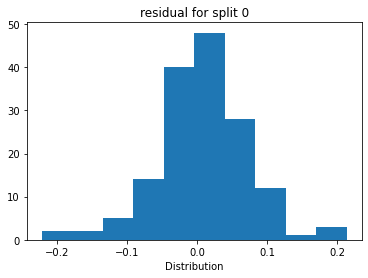

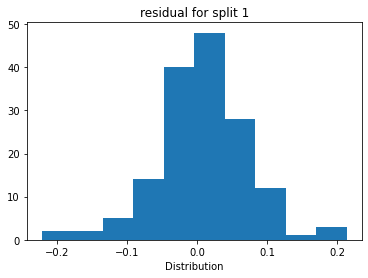

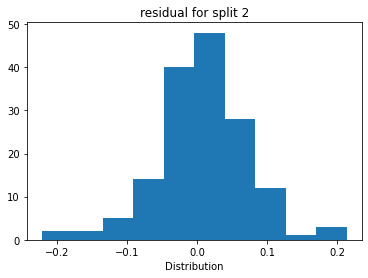

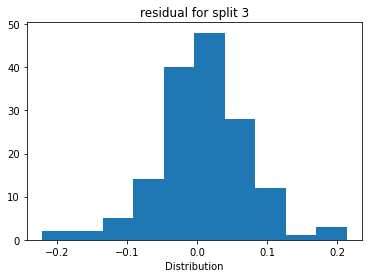

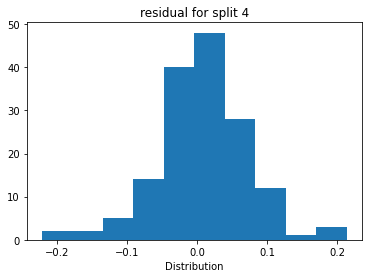

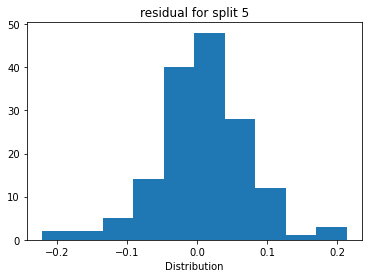

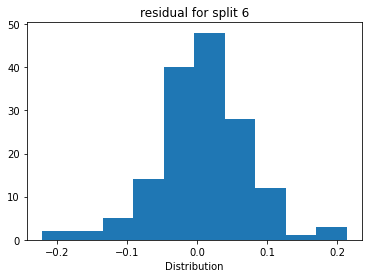

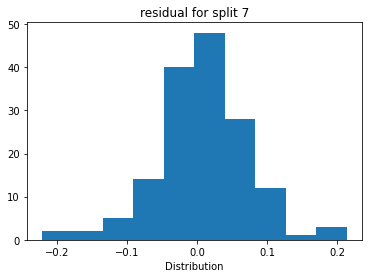

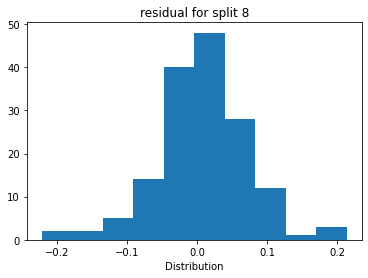

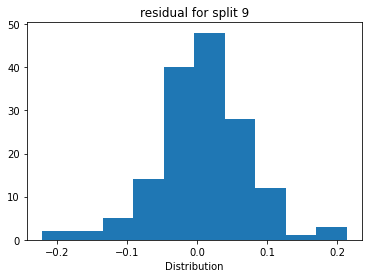

In [38]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=0

for train_index, test_index in cv.split(X):
    
    X_train_RandomForest, X_test_RandomForest =X_RandomForest.reindex(train_index), X_RandomForest.reindex(test_index)
    y_train_RandomForest, y_test_RandomForest = y_RandomForest.reindex(train_index), y_RandomForest.reindex(test_index).reset_index(drop=True)

    
    X_train_RandomForest = X_train_RandomForest.dropna()
    X_test_RandomForest = X_test_RandomForest.dropna()
    y_train_RandomForest = y_train_RandomForest.dropna()
    y_test_RandomForest = y_test_RandomForest.dropna()
    
    X_train_RandomForest= sc.fit_transform(X_train_RandomForest.iloc[:, 1:])  
    X_test_RandomForest= sc.fit_transform(X_test_RandomForest.iloc[:, 1:])  
    y_train_RandomForest=sc.fit_transform(y_train_RandomForest.values.reshape(-1,1)) 
    y_test_RandomForest= sc.fit_transform(y_test_RandomForest.values.reshape(-1, 1))  
    
    
    
    rf.fit(X_train_RandomForest, y_train_RandomForest.ravel())
    
    pred_rf = rf.predict(X_test_RandomForest)
    residual_rf= y_test_RandomForest-pred_rf
    fig, ax = plt.subplots()
    ax.hist( residual)
    print(" ")
    print('Accuracy for Split '+ str(p) + ':')
    # View accuracy score
    print(rf.score(X_test_RandomForest, y_test_RandomForest))
#     # Use the forest's predict method on the test data
    
    print('MSE: ' +str(mean_squared_error(y_test_RandomForest, pred_rf)))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf))))
    print('Rsquaed: '+ str(r2_score(y_test_RandomForest, pred_rf)))
    print('MAE: ' + str(mean_absolute_error(y_test_RandomForest, pred_rf)))
    print(" ")
    ax.set_xlabel("Distribution")
    ax.set_title('residual for split ' + str(p))
    
    p+=1
   
    accuracy_scores.append(rf.score(X_test_RandomForest, y_test_RandomForest))
    mse.append(mean_squared_error(y_test_RandomForest, pred_rf))
    rmse.append(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf)))
    rsquared.append(r2_score(y_test_RandomForest, pred_rf))
    mae.append(mean_absolute_error(y_test_RandomForest, pred_rf))
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))






    
   
 

In [39]:
feature_list = list(X.iloc[:, 1:].columns)

importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: 4. close             Importance: 0.98
Variable: 6. volume            Importance: 0.01
Variable: change_in_price      Importance: 0.0
Variable: k_percent            Importance: 0.0
Variable: r_percent            Importance: 0.0
Variable: MACD                 Importance: 0.0
Variable: Price_Rate_Of_Change Importance: 0.0


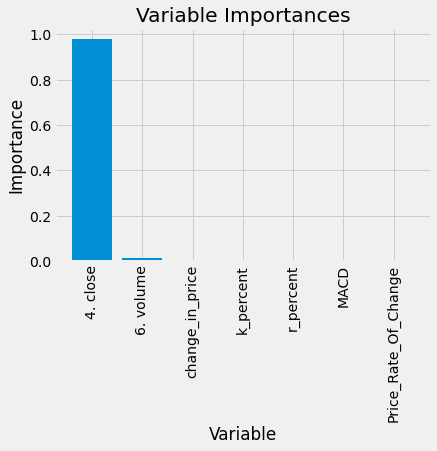

In [40]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# LSTM

In [41]:
X_lstm= X
y_lstm = y

X_lstm.drop(['date'], axis = 1, inplace=True) 
# y_lstm.drop(['date'], axis = 1, inplace=True) 

In [42]:
X_lstm.head(10)

4. close    6. volume  change_in_price  k_percent  r_percent      MACD  \
13   121.030   88105050.0           -2.960  25.956938 -74.043062  0.260643   
14   121.960  103026514.0            0.930  37.081340 -62.918660  0.203122   
15   119.980  111943326.0           -1.980  12.771084 -87.228916  0.036837   
16   121.085  129525780.0            1.105  27.224199 -72.775801 -0.022054   
17   116.360  154376610.0           -4.725   1.362398 -98.637602 -0.364795   
18   121.420  153766601.0            5.060  47.320618 -52.679382 -0.299164   
19   120.130  178154975.0           -1.290  35.603996 -64.396004 -0.329058   
20   122.060  112966340.0            1.930  53.133515 -46.866485 -0.220522   
21   125.120  102260945.0            3.060  71.223022 -28.776978  0.071388   
22   127.790  116307892.0            2.670  92.565947  -7.434053  0.478326   

    Price_Rate_Of_Change  
13              0.003649  
14              0.015572  
15             -0.020891  
16             -0.018681  
17             -0.030253  
18              0.007384  
19             -0.037111  
20             -0.027953  
21              0.009114  
22              0.055854

In [43]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot


accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

for train_index, test_index in cv.split(X_lstm):
    X_train_lstm, X_test_lstm =X_lstm.reindex(train_index), X_lstm.reindex(test_index)
    y_train_lstm, y_test_lstm = y_lstm.reindex(train_index), y_lstm.reindex(test_index).reset_index(drop=True)
    
    
    
    X_train_lstm = X_train_lstm.dropna()
    X_test_lstm = X_test_lstm.dropna()
    y_train_lstm = y_train_lstm.dropna()
    y_test_lstm = y_test_lstm.dropna()
    
    X_train_lstm= sc.fit_transform(X_train_lstm.iloc[:, 1:])  
    X_test_lstm= sc.fit_transform(X_test_lstm.iloc[:, 1:])  
    y_train_lstm=sc.fit_transform(y_train_lstm.values.reshape(-1,1)) 
    y_test_lstm= sc.fit_transform(y_test_lstm.values.reshape(-1, 1))  
    
    
    
    X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
    X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
    
    inputs = keras.layers.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    x = keras.layers.LSTM(300, return_sequences= True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300, return_sequences=True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300)(x)
    outputs = keras.layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss="mse", metrics=['accuracy','mean_squared_error', 'mae', 'mape'])
    model.summary()
    
    histoty=model.fit(
    X_train_lstm, y_train_lstm,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2)
    
    scores = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    accuracy_scores.append(scores[1])
    print("MSE:" + str((scores[2])))
    mse.append(scores[2])
    print("MAE:" + str((scores[3])))
    mae.append(scores[3])
    print('RMSE: ' + str(math.sqrt(scores[2])))
    
    y_pred = model.predict(X_test_lstm)
    
    print('R2 Score: ', r2_score(y_test_lstm, y_pred))
    rsquared.append(r2_score(y_test_lstm, y_pred))
    

#     pyplot.plot(history.history['loss'])
#     pyplot.plot(history.history['val_loss'])
#     pyplot.title('model train vs validation loss')
#     pyplot.ylabel('loss')
#     pyplot.xlabel('epoch')
#     pyplot.legend(['train', 'validation'], loc='upper right')
#     pyplot.show()
    
    


mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))



rsquared_avg= np.mean(rsquared)
print('Average Accuracy ='+ str(rsquared_avg))

# rmse_avg= np.mean(rmse)
# print('Average RMSE ='+ str(scores[1]))

# rsquared_avg= np.mean(rsquared)
# print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))
    
#     print('MSE =' + str(history.history['mean_squared_error']))
    # Trai the model
#      y_train_rf, y_test_rf = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    
#     y_train_rf = y_train_rf.dropna()
#     X_train_rf = X_train_rf.dropna()
#     y_test_rf = y_test_rf.dropna()
#     X_test_rf = X_test_rf.dropna()
#     rf.fit(X_train_rf.iloc[:, 1:], y_train_rf)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 6, 300)            362400    
_________________________________________________________________
dropout (Dropout)            (None, 6, 300)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 300)            721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 300)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 1)                 301   

35/35 [==============================] - 8s 112ms/step - loss: 0.0232 - accuracy: 1.8590e-04 - mean_squared_error: 0.0232 - mae: 0.1160 - mape: 33257.5979 - val_loss: 0.0151 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0151 - val_mae: 0.1200 - val_mape: 313.8994
Epoch 2/20
35/35 [==============================] - 3s 87ms/step - loss: 0.0142 - accuracy: 0.0012 - mean_squared_error: 0.0142 - mae: 0.0890 - mape: 175579.8794 - val_loss: 0.0170 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0170 - val_mae: 0.1275 - val_mape: 328.4642
Epoch 3/20
35/35 [==============================] - 3s 90ms/step - loss: 0.0162 - accuracy: 0.0028 - mean_squared_error: 0.0162 - mae: 0.0951 - mape: 454431.3022 - val_loss: 0.0100 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0100 - val_mae: 0.0965 - val_mape: 265.0506
Epoch 4/20
35/35 [==============================] - 3s 92ms/step - loss: 0.0146 - accuracy: 1.5697e-04 - mean_squared_error: 0.0146 - mae: 0.0906 - mape: 18306.9228 - 

35/35 [==============================] - 3s 90ms/step - loss: 0.0327 - accuracy: 0.0016 - mean_squared_error: 0.0327 - mae: 0.1298 - mape: 277559.5841 - val_loss: 0.0168 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0168 - val_mae: 0.1233 - val_mape: 334.3278
Epoch 6/20
35/35 [==============================] - 3s 86ms/step - loss: 0.0353 - accuracy: 5.0005e-05 - mean_squared_error: 0.0353 - mae: 0.1421 - mape: 10441.2316 - val_loss: 0.0266 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0266 - val_mae: 0.1599 - val_mape: 396.3188
Epoch 7/20
35/35 [==============================] - 3s 86ms/step - loss: 0.0337 - accuracy: 0.0016 - mean_squared_error: 0.0337 - mae: 0.1336 - mape: 85107.4289 - val_loss: 0.0124 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0124 - val_mae: 0.1034 - val_mape: 289.3328
Epoch 8/20
35/35 [==============================] - 3s 86ms/step - loss: 0.0315 - accuracy: 0.0016 - mean_squared_error: 0.0315 - mae: 0.1287 - mape: 237611.6466 - val_l

35/35 [==============================] - 3s 83ms/step - loss: 0.0326 - accuracy: 8.0230e-04 - mean_squared_error: 0.0326 - mae: 0.1385 - mape: 201673.1741 - val_loss: 0.0085 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0085 - val_mae: 0.0721 - val_mape: 220.4248
Epoch 10/20
35/35 [==============================] - 3s 81ms/step - loss: 0.0341 - accuracy: 0.0031 - mean_squared_error: 0.0341 - mae: 0.1412 - mape: 274087.7870 - val_loss: 0.0360 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0360 - val_mae: 0.1864 - val_mape: 456.9999
Epoch 11/20
35/35 [==============================] - 3s 82ms/step - loss: 0.0297 - accuracy: 0.0021 - mean_squared_error: 0.0297 - mae: 0.1326 - mape: 413458.5159 - val_loss: 0.0228 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0228 - val_mae: 0.1452 - val_mape: 380.3081
Epoch 12/20
35/35 [==============================] - 3s 81ms/step - loss: 0.0305 - accuracy: 0.0019 - mean_squared_error: 0.0305 - mae: 0.1348 - mape: 163278.4394 - 

35/35 [==============================] - 3s 80ms/step - loss: 0.0309 - accuracy: 0.0021 - mean_squared_error: 0.0309 - mae: 0.1363 - mape: 298314.3463 - val_loss: 0.0060 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0060 - val_mae: 0.0684 - val_mape: 206.2414
Epoch 14/20
35/35 [==============================] - 3s 81ms/step - loss: 0.0329 - accuracy: 0.0011 - mean_squared_error: 0.0329 - mae: 0.1386 - mape: 152857.6040 - val_loss: 0.0110 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0110 - val_mae: 0.0964 - val_mape: 270.0374
Epoch 15/20
35/35 [==============================] - 3s 90ms/step - loss: 0.0320 - accuracy: 0.0028 - mean_squared_error: 0.0320 - mae: 0.1377 - mape: 629479.4399 - val_loss: 0.0102 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0102 - val_mae: 0.0952 - val_mape: 249.5497
Epoch 16/20
35/35 [==============================] - 4s 101ms/step - loss: 0.0325 - accuracy: 0.0019 - mean_squared_error: 0.0325 - mae: 0.1337 - mape: 312635.2270 - val

35/35 [==============================] - 3s 91ms/step - loss: 0.0312 - accuracy: 0.0023 - mean_squared_error: 0.0312 - mae: 0.1364 - mape: 419252.2917 - val_loss: 0.0115 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0115 - val_mae: 0.1028 - val_mape: 277.0071
Epoch 18/20
35/35 [==============================] - 3s 85ms/step - loss: 0.0292 - accuracy: 0.0019 - mean_squared_error: 0.0292 - mae: 0.1319 - mape: 441966.8725 - val_loss: 0.0303 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0303 - val_mae: 0.1710 - val_mape: 425.6402
Epoch 19/20
35/35 [==============================] - 3s 93ms/step - loss: 0.0274 - accuracy: 0.0012 - mean_squared_error: 0.0274 - mae: 0.1277 - mape: 142796.7505 - val_loss: 0.0261 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.0261 - val_mae: 0.1574 - val_mape: 403.4665
Epoch 20/20
35/35 [==============================] - 3s 93ms/step - loss: 0.0314 - accuracy: 0.0011 - mean_squared_error: 0.0314 - mae: 0.1352 - mape: 70077.7416 - val_l

R2 Score:  0.038760439300630445
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 6, 1)]            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 6, 300)            362400    
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 300)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 6, 300)            721200    
_________________________________________________________________
dropout_15 (Dropout)         (None, 6, 300)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 300)               721200    
_________________________________________________________________
dense_7 (Dense)            

35/35 [==============================] - 10s 128ms/step - loss: 0.0451 - accuracy: 0.0000e+00 - mean_squared_error: 0.0451 - mae: 0.1560 - mape: 87.3691 - val_loss: 0.0512 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0512 - val_mae: 0.2242 - val_mape: 936126.5000
Epoch 2/20
35/35 [==============================] - 3s 96ms/step - loss: 0.0318 - accuracy: 0.0000e+00 - mean_squared_error: 0.0318 - mae: 0.1346 - mape: 88.8514 - val_loss: 0.0402 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0402 - val_mae: 0.1984 - val_mape: 892295.5625
Epoch 3/20
35/35 [==============================] - 3s 97ms/step - loss: 0.0335 - accuracy: 0.0000e+00 - mean_squared_error: 0.0335 - mae: 0.1357 - mape: 86.4641 - val_loss: 0.0350 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0350 - val_mae: 0.1848 - val_mape: 844860.7500
Epoch 4/20
35/35 [==============================] - 3s 88ms/step - loss: 0.0314 - accuracy: 0.0000e+00 - mean_squared_error: 0.0314 - mae: 0.1325 - mape: 87.2037 - val_loss

35/35 [==============================] - 3s 95ms/step - loss: 0.0276 - accuracy: 0.0000e+00 - mean_squared_error: 0.0276 - mae: 0.1234 - mape: 79.5522 - val_loss: 0.0528 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0528 - val_mae: 0.2288 - val_mape: 868757.2500
Epoch 6/20
35/35 [==============================] - 3s 99ms/step - loss: 0.0291 - accuracy: 0.0000e+00 - mean_squared_error: 0.0291 - mae: 0.1258 - mape: 77.6978 - val_loss: 0.0364 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0364 - val_mae: 0.1895 - val_mape: 781487.8750
Epoch 7/20
35/35 [==============================] - 3s 89ms/step - loss: 0.0288 - accuracy: 0.0000e+00 - mean_squared_error: 0.0288 - mae: 0.1271 - mape: 74.6530 - val_loss: 0.0340 - val_accuracy: 0.0036 - val_mean_squared_error: 0.0340 - val_mae: 0.1835 - val_mape: 743994.7500
Epoch 8/20
35/35 [==============================] - 3s 93ms/step - loss: 0.0298 - accuracy: 0.0000e+00 - mean_squared_error: 0.0298 - mae: 0.1268 - mape: 77.4084 - val_loss: 

In [44]:
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

In [45]:
starting_date='2015-01-01'
pd.options.mode.chained_assignment = None  # default='warn'

def pricePrediction(symbol,days, starting_date):
#     obtain stock data
    stock_df= stock_data(sym,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_madcd(stock_df)
    calc_price_rate_of_change(stock_df)
    
#     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
#     remove the last column of the data as it will be null
    stock_df_targeted= stock_df_targeted[:-1]

    
    stock_df_targeted.reset_index(inplace = True)
    stock_df_targeted = stock_df_targeted.dropna()
    
    stock_df_targeted_scaled= stock_df_targeted
    stock_df_targeted_scaled.head(10)
    stock_df_targeted_scaled.drop(['Ticker','1. open','2. high','3. low', '5. adjusted close', '7. dividend amount', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    
    
    stock_df_targeted_scaled = sc.fit_transform(stock_df_targeted_scaled.drop(columns = ['date']))
    
    # Creating Feature and Target
    X = stock_df_targeted_scaled[:,:6]
    y = stock_df_targeted_scaled[:,6:]
    
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    show_plot(X_train, 'Training Data')
    show_plot(X_test, 'Testing Data')
    
    regression_model = Ridge()
    regression_model.fit(X_train, y_train)
    
    lr_accuracy = regression_model.score(X_test, y_test)
    predicted_prices = regression_model.predict(X)
    
    
    print("Linear Regression Score: ", lr_accuracy)
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y, predicted_prices))))
    print('Rsquared '+ str(r2_score(y, predicted_prices)))
    print('MAE: ' + str(mean_absolute_error(y, predicted_prices)))
    
    

    
    Predicted = []
    for i in predicted_prices:
        Predicted.append(i[0])
        
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
    
    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = Predicted
    
    interactive_plot(df_predicted, "Original Vs. Prediction")
    
    

In [46]:
# pricePrediction('VOO', 1,starting_date )

Linear Regression Score:  0.8202207331475742
RMSE: 0.025489839372628498
Rsquared 0.9784812061273997
MAE: 0.01024628653703853


Linear Regression Score:  -0.41344014332355394
RMSE: 0.06911330544564902
Rsquared 0.8422887512725648
MAE: 0.03217731720141607


Linear Regression Score:  -5.3902592314176205
RMSE: 0.10326028523779084
Rsquared 0.6511054798576839
MAE: 0.061094198687550796


Linear Regression Score:  -16.429931847790847
RMSE: 0.12911187146393327
Rsquared 0.4620354569052325
MAE: 0.08815262204451188


Linear Regression Score:  -25.340195578177813
RMSE: 0.13643287851971408
Rsquared 0.40476018036817607
MAE: 0.10015864239245172


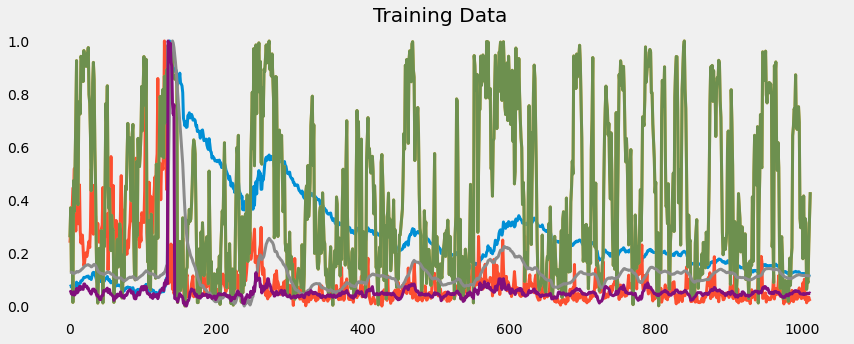

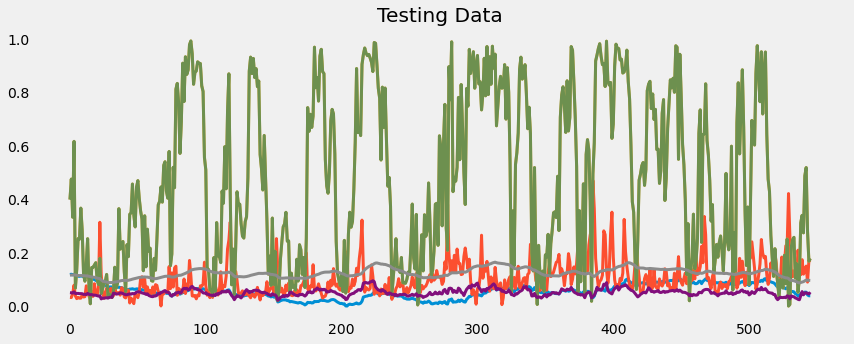

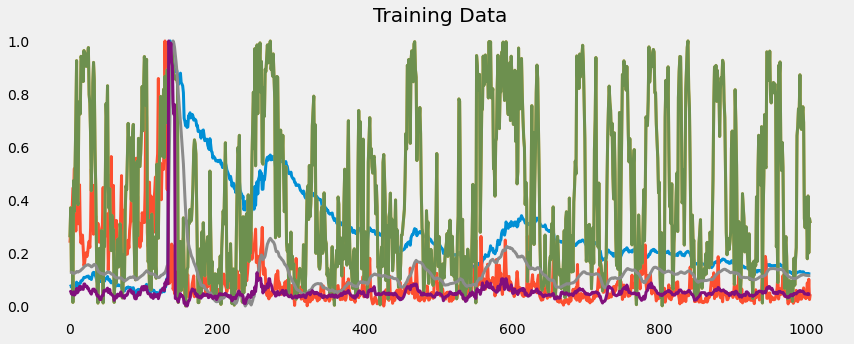

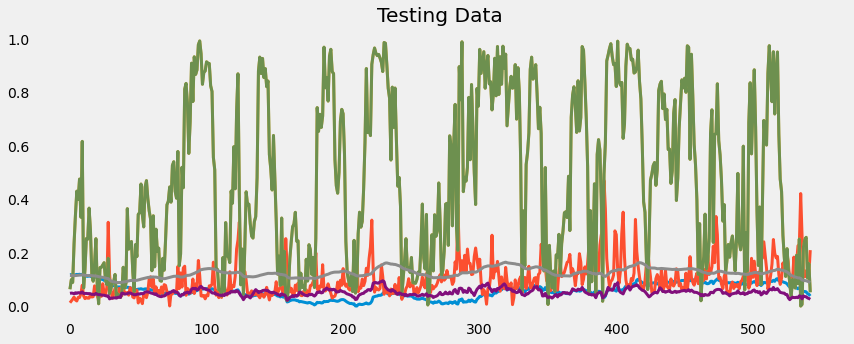

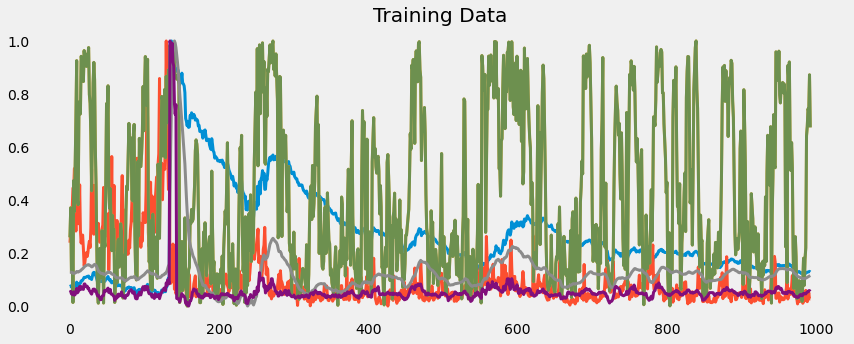

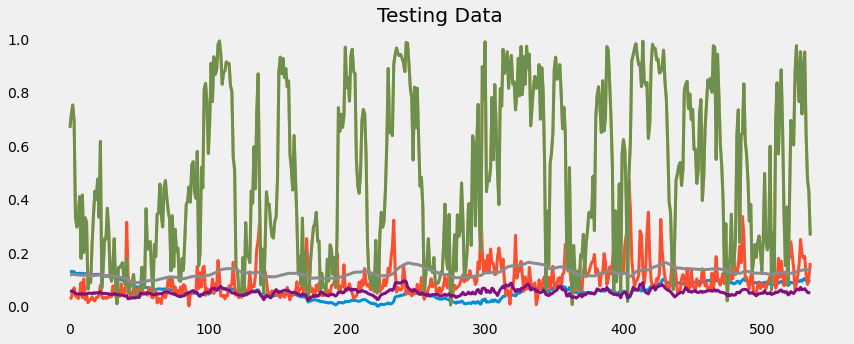

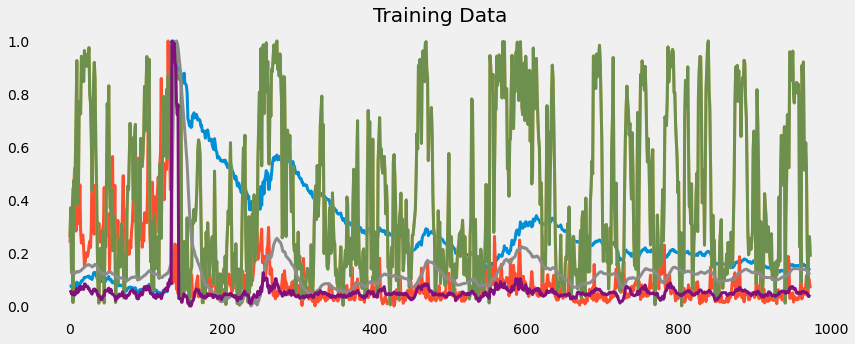

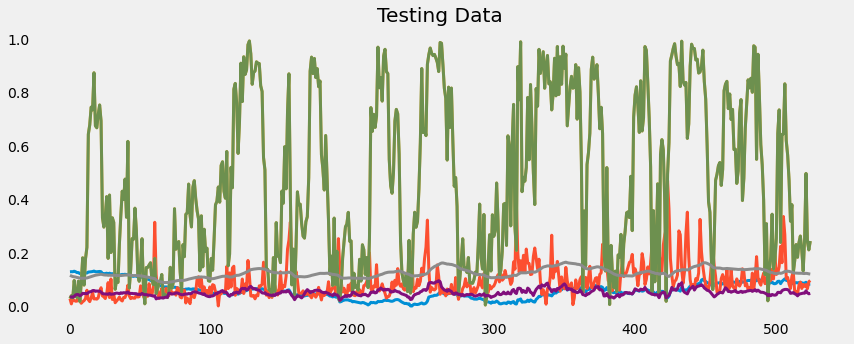

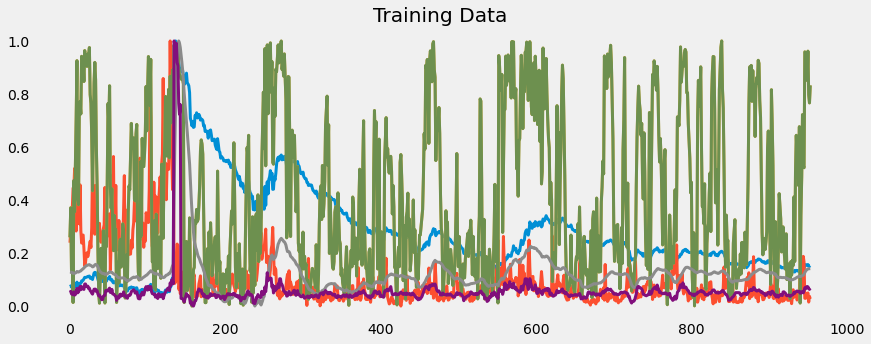

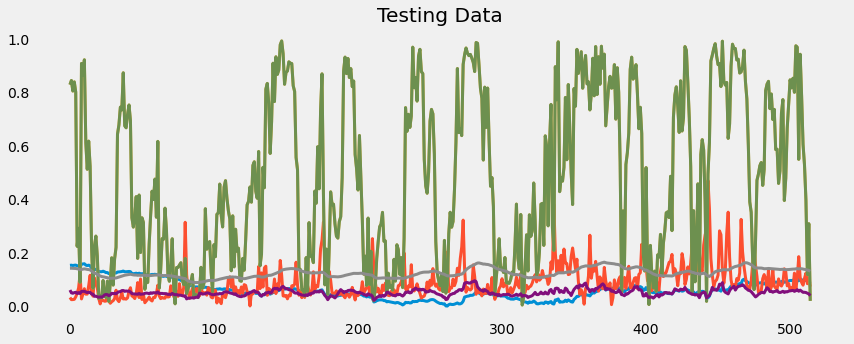

In [47]:
windows = [1,10,30,60,90]
for i in windows:
    pricePrediction('VOO', i,starting_date )

